CNOT(0) = 
0.0  1.0  0.0  0.0  
1.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  


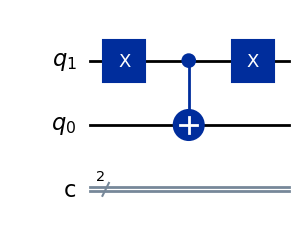

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import UnitarySimulator

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.x(q[1])

qc.cx(q[1],q[0])

# Returning control qubit to the initial state
qc.x(q[1])

job = UnitarySimulator().run(qc, shots = 1)
U=job.result().get_unitary(qc,decimals=3).data

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True)

 CCNOT(Toffoli)

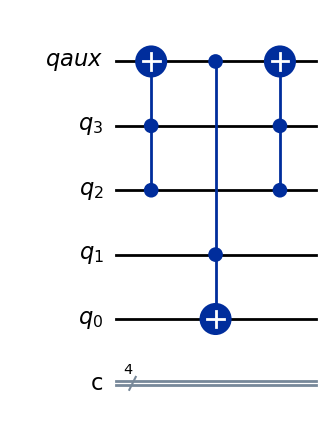

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

qaux = QuantumRegister(1,"qaux")
q = QuantumRegister(4,"q")
c = ClassicalRegister(4,"c")

qc = QuantumCircuit(q,qaux,c)

# step 1: set qaux to |1> if both q3 and q2 are in |1>
qc.ccx(q[3],q[2],qaux[0])

# step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
qc.ccx(qaux[0],q[1],q[0])

# step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
qc.ccx(q[3],q[2],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

Bu teknik, kuantum algoritmalarında koşullu işlemler yapmak, hata düzeltme kodları oluşturmak ve kuantum mantık devreleri tasarlamak için kullanılır. 

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(1,"qaux")
    q = QuantumRegister(4,"q")
    c = ClassicalRegister(4,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[3])
    if the_input[1] =='1': qc.x(q[2])
    if the_input[2] =='1': qc.x(q[1])
    if the_input[3] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[3],q[2],qaux[0])
    qc.ccx(qaux[0],q[1],q[0])
    qc.ccx(q[3],q[2],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = AerSimulator().run(qc,shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:3]+" "+the_input[3]+" --> "+the_output[0:3]+" "+the_output[3]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
000 0 --> 000 0
000 1 --> 000 1
001 0 --> 001 0
001 1 --> 001 1
010 0 --> 010 0
010 1 --> 010 1
011 0 --> 011 0
011 1 --> 011 1
100 0 --> 100 0
100 1 --> 100 1
101 0 --> 101 0
101 1 --> 101 1
110 0 --> 110 0
110 1 --> 110 1
111 0 --> 111 1 the output is different than the input
111 1 --> 111 0 the output is different than the input
